In [11]:
import pandas as pd

df = pd.read_csv("results/summary.csv")
print(df)

# Tính thống kê theo từng task
stats = df.groupby("task_idx")["best_cost"].agg(["mean", "std", "min", "max"])
print(stats)

  problem  task_idx  seed    best_cost  best_cv  \
0    CMT1         0     0     2.807119      0.0   
1    CMT1         1     0  4329.972543      0.0   
2    CMT1         0     1     4.032380      0.0   
3    CMT1         1     1  3271.574239      0.0   
4    CMT1         0     2     5.144622      0.0   
5    CMT1         1     2  3404.559552      0.0   
6    CMT1         0     3     4.572107      0.0   
7    CMT1         1     3  3560.118617      0.0   
8    CMT1         0     4     4.524688      0.0   
9    CMT1         1     4  4020.406479      0.0   

                                           conv_file  \
0  results/CMT1/CMT1_seed0_20251123T073516Z_conv.npy   
1  results/CMT1/CMT1_seed0_20251123T073516Z_conv.npy   
2  results/CMT1/CMT1_seed1_20251123T073517Z_conv.npy   
3  results/CMT1/CMT1_seed1_20251123T073517Z_conv.npy   
4  results/CMT1/CMT1_seed2_20251123T073517Z_conv.npy   
5  results/CMT1/CMT1_seed2_20251123T073517Z_conv.npy   
6  results/CMT1/CMT1_seed3_20251123T073517Z_co

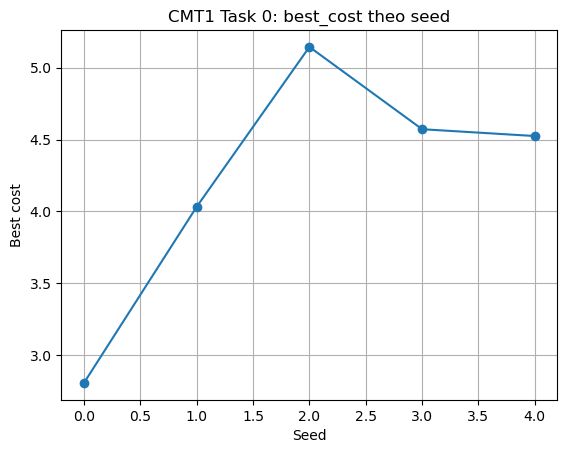

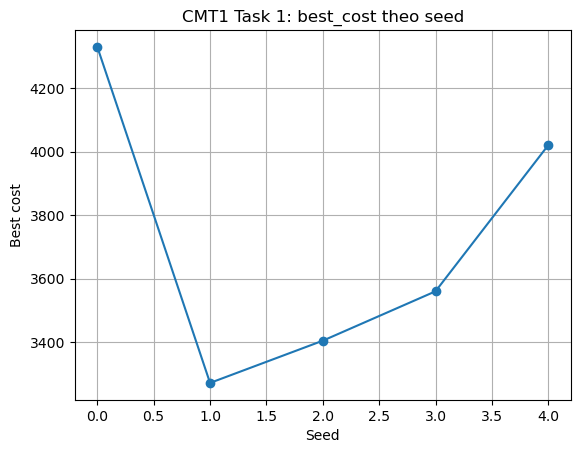

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results/summary.csv")

# Tách hai task
df_t0 = df[df["task_idx"] == 0]
df_t1 = df[df["task_idx"] == 1]

plt.figure()
plt.title("CMT1 Task 0: best_cost theo seed")
plt.plot(df_t0["seed"], df_t0["best_cost"], marker="o")
plt.xlabel("Seed")
plt.ylabel("Best cost")
plt.grid(True)
plt.show()

plt.figure()
plt.title("CMT1 Task 1: best_cost theo seed")
plt.plot(df_t1["seed"], df_t1["best_cost"], marker="o")
plt.xlabel("Seed")
plt.ylabel("Best cost")
plt.grid(True)
plt.show()

In [13]:
import numpy as np

xs = np.linspace(0, 1, 101)
ys = np.linspace(0, 1, 101)

grid = [(x, y) for x in xs for y in ys]

In [14]:
def constraint2(a, Z):
    return np.sum(a**2) - 100 * Z

In [15]:
task1_points = []
task2_points = []

for x, y in grid:
    a = np.array([x, y])

    if constraint2(a, Z=2) <= 0:
        task1_points.append((x, y))

    if constraint2(a, Z=2) <= 0:   # hoặc constraint khác cho task 2
        task2_points.append((x, y))

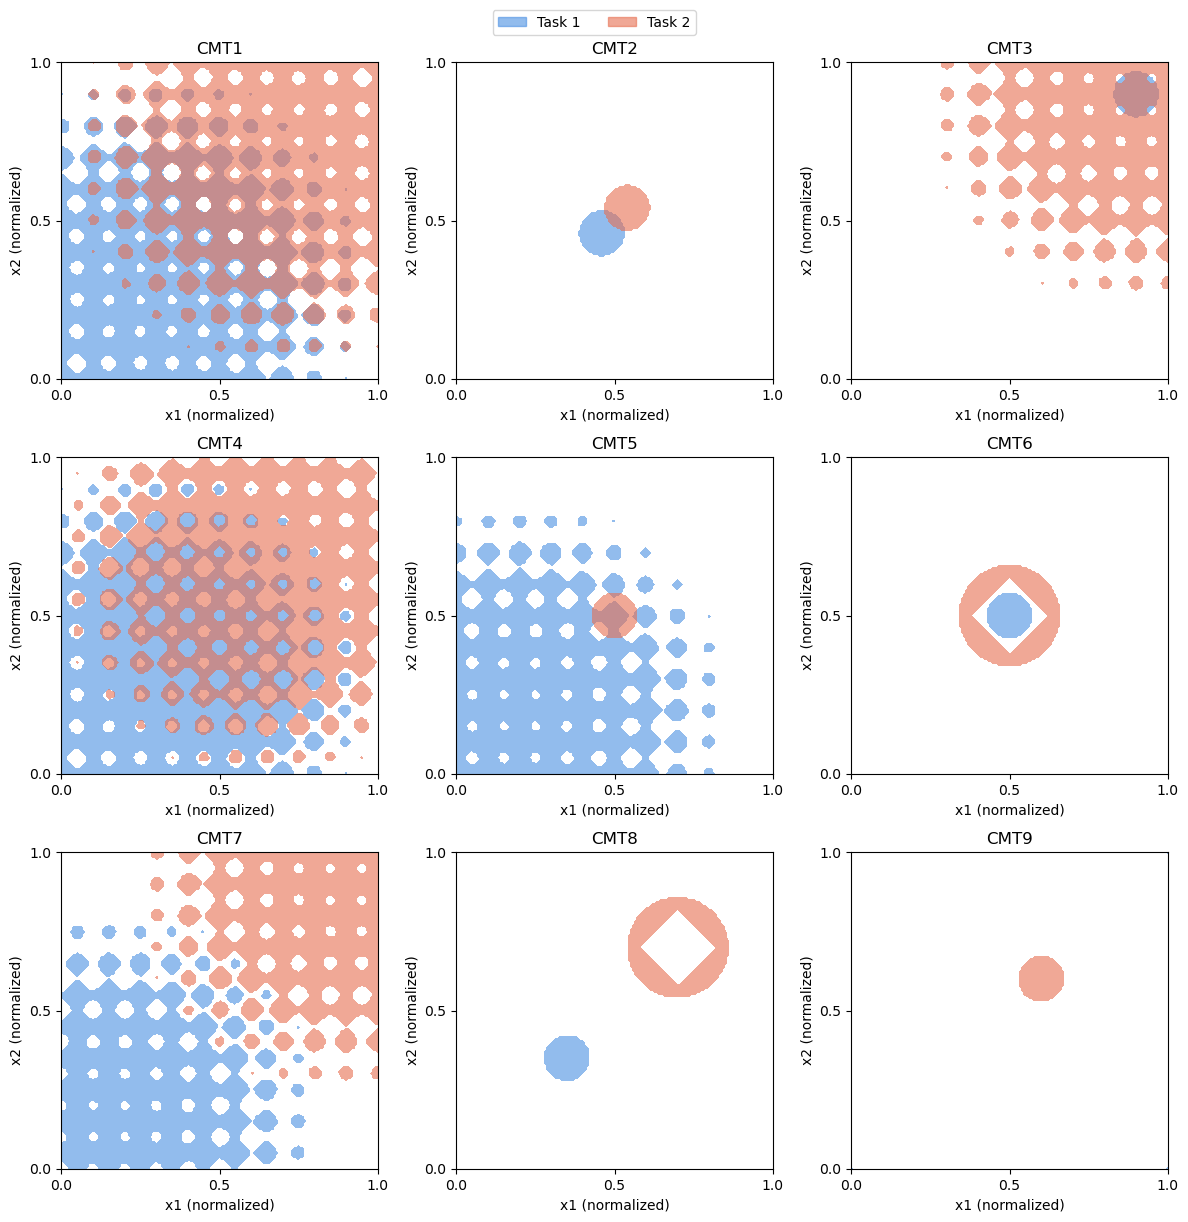

In [3]:
import sys, importlib, pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

ROOT = pathlib.Path.cwd()
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

TASK_COLORS = ["#4a90e2", "#e76f51"]  # xanh cho Task 1, đỏ cho Task 2

def load_problem(idx, dims=2):
    mod = importlib.import_module(f"Problems_py.Multi_task.Constrained_CMT.CMT{idx}")
    cls = getattr(mod, f"CMT{idx}")
    p = cls()
    p.dims = dims  # chỉ để vẽ 2D
    return p

def feasible_mask(task, grid_n=140, tol=1e-9):
    lb, ub = np.asarray(task["Lb"], float), np.asarray(task["Ub"], float)
    xs = np.linspace(0.0, 1.0, grid_n)  # trục chuẩn hóa
    ys = np.linspace(0.0, 1.0, grid_n)
    mask = np.zeros((grid_n, grid_n), dtype=bool)
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            v = np.zeros(task["dims"], float)
            # map ngược về khoảng gốc cho x1, x2
            v[0] = lb[0] + x * (ub[0] - lb[0])
            v[1] = lb[1] + y * (ub[1] - lb[1])
            obj, con = task["fnc"](v)
            mask[i, j] = con <= tol  # khả thi nếu không vi phạm
    return xs, ys, mask

def plot_feasible_grid(grid_n=140):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    legend_handles = [Patch(color=TASK_COLORS[0], alpha=0.6, label="Task 1"),
                      Patch(color=TASK_COLORS[1], alpha=0.6, label="Task 2")]

    for pid in range(1, 10):
        ax = axes[(pid - 1) // 3, (pid - 1) % 3]
        prob = load_problem(pid)
        tasks = prob.get_tasks()

        for t_idx, task in enumerate(tasks):
            xs, ys, mask = feasible_mask(task, grid_n=grid_n)
            X, Y = np.meshgrid(xs, ys)
            ax.contourf(X, Y, mask, levels=[0.5, 1.0],
                        colors=[TASK_COLORS[t_idx]], alpha=0.6)

        ax.set_title(f"CMT{pid}")
        ax.set_xlim(0, 1); ax.set_ylim(0, 1)
        ax.set_xticks([0, 0.5, 1]); ax.set_yticks([0, 0.5, 1])
        ax.set_xlabel("x1 (normalized)")
        ax.set_ylabel("x2 (normalized)")
        ax.set_aspect("equal")

    fig.legend(handles=legend_handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.02))
    plt.tight_layout()
    plt.show()

plot_feasible_grid(grid_n=160)  # tăng/giảm mật độ lưới nếu cần


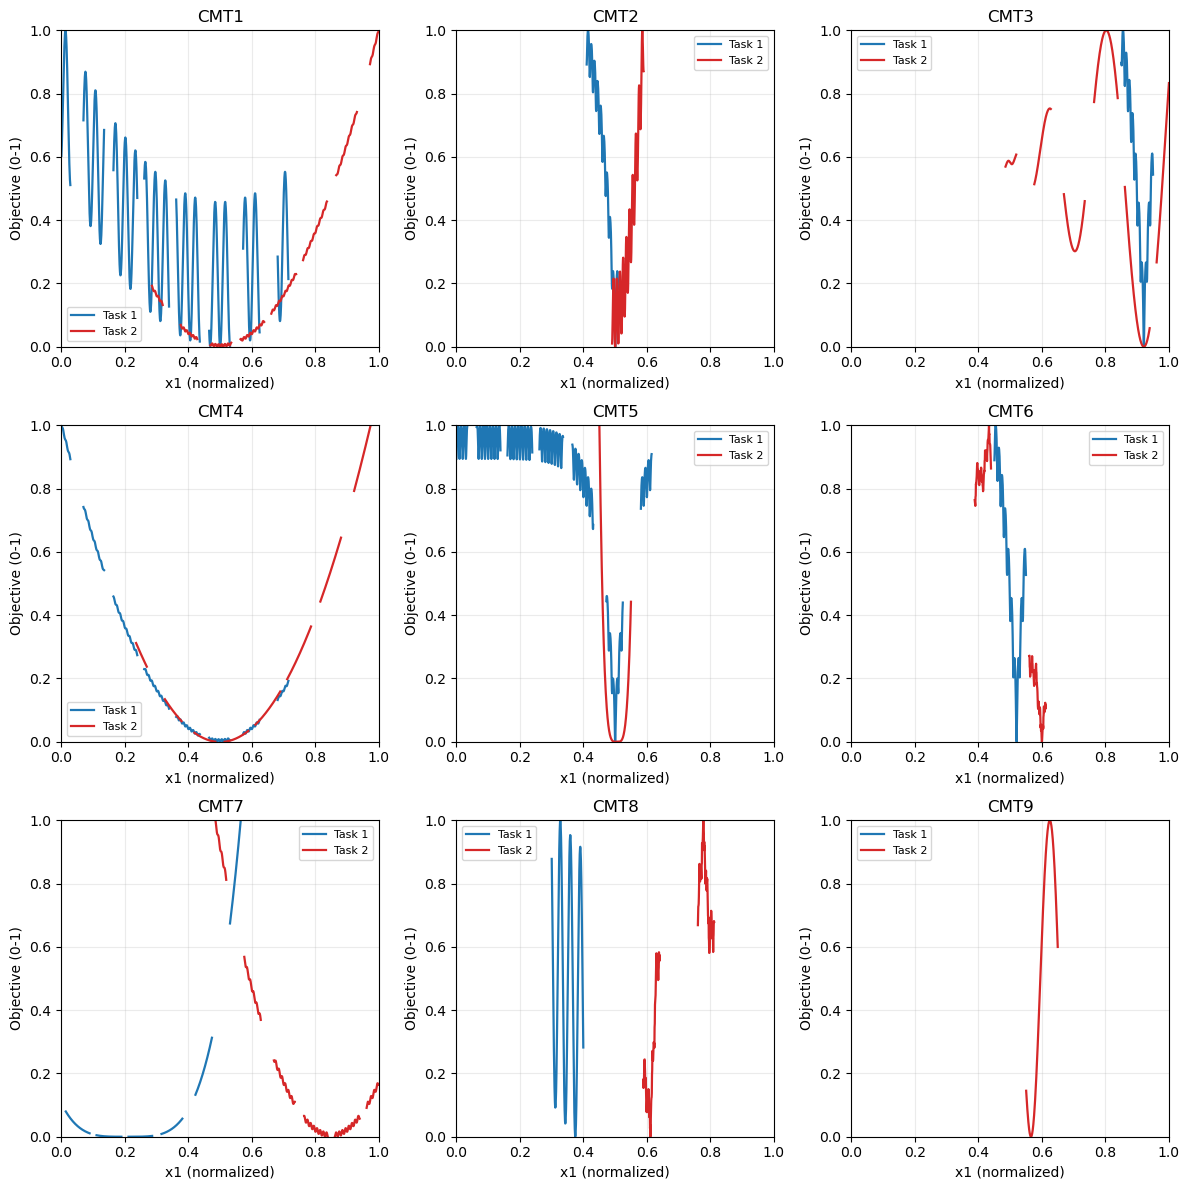

In [7]:
import sys, importlib, pathlib
import numpy as np
import matplotlib.pyplot as plt

ROOT = pathlib.Path.cwd()
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

COLS = ["#1f77b4", "#d62728"]

def load_problem(idx, dims=1):
    mod = importlib.import_module(f"Problems_py.Multi_task.Constrained_CMT.CMT{idx}")
    cls = getattr(mod, f"CMT{idx}")
    p = cls()
    p.dims = dims
    return p

def sample_obj_1d(task, n=1500, tol=1e-9):
    lb, ub = np.asarray(task["Lb"], float), np.asarray(task["Ub"], float)
    xs_norm = np.linspace(0.0, 1.0, n)
    xs_real = lb[0] + xs_norm * (ub[0] - lb[0])
    objs = np.zeros(n, float)
    feas = np.zeros(n, bool)
    for i, xr in enumerate(xs_real):
        v = np.zeros(task["dims"], float)
        v[0] = xr
        obj, c = task["fnc"](v)
        objs[i] = obj
        feas[i] = c <= tol
    feas_obj = np.where(feas, objs, np.nan)
    return xs_norm, feas_obj

def normalize01(arr):
    finite = arr[~np.isnan(arr)]
    if finite.size == 0:
        return arr
    lo, hi = np.nanmin(finite), np.nanmax(finite)
    if hi == lo:
        return np.where(np.isnan(arr), np.nan, 0.5)  # hằng -> 0.5
    return (arr - lo) / (hi - lo)

def plot_objectives_1d_normalized(n=1500):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    for pid in range(1, 10):
        ax = axes[(pid - 1) // 3, (pid - 1) % 3]
        prob = load_problem(pid)
        tasks = prob.get_tasks()
        for t_idx, t in enumerate(tasks):
            x, feas_obj = sample_obj_1d(t, n=n)
            y_norm = normalize01(feas_obj)
            ax.plot(x, y_norm, color=COLS[t_idx], lw=1.6, label=f"Task {t_idx+1}")
        ax.set_xlim(0, 1); ax.set_ylim(0, 1)
        ax.set_title(f"CMT{pid}")
        ax.set_xlabel("x1 (normalized)")
        ax.set_ylabel("Objective (0-1)")
        ax.legend(fontsize=8, loc="best")
        ax.grid(True, alpha=0.25)
    plt.tight_layout()
    plt.show()

plot_objectives_1d_normalized(n=1600)
